In [6]:
import numpy as np
import qutip as qt
from matplotlib import pyplot as plt
from scipy.special import hermite
from scipy.integrate import quad

In [7]:
N = 100  # Size of the Hilbert space
omega = 1.0  # Oscillator frequency
m = 1.0  # Mass of the particle
hbar = 1.0  # Planck's constant in natural units

# Position and momentum scaling factors
x_0 = 1 / np.sqrt(2 * m * omega)  # x_0: characteristic length scale
p_0 = np.sqrt(m * omega / 2)  # p_0: characteristic momentum scale

# ### Define operators for the quantum harmonic oscillator

a = qt.destroy(N)  # Annihilation operator
id_op = qt.identity(N)  # Identity operator
n_op = a.dag() * a  # Number operator
x_op = (a + a.dag()) * x_0  # Position operator
p_op = -1j * (a - a.dag()) * p_0  # Momentum operator

def harmonic_potential(x, omega, m=1):
    """
    Harmonic oscillator potential function.
    V(x) = 0.5 * m * omega^2 * x^2
    """
    return 0.5 * m * omega**2 * x**2

x_values = np.linspace(-5 * x_0, 5 * x_0, 1000)  # Position grid

# Define wavefunctions based on the recurrence relation
def psi_0(x):
    return (1 / (2 * np.pi * x_0**2)**0.25) * np.exp(-x**2 / (4 * x_0**2))

def psi_1(x):
    return (x / x_0) * psi_0(x)

def psi_2(x):
    return (1 / np.sqrt(2)) * ((x / x_0)**2 - 1) * psi_0(x)

def psi_3(x):
    return (1 / np.sqrt(6)) * (x / x_0) * ((x / x_0)**2 - 3) * psi_0(x)

def prob_0(x):
    return np.abs(psi_0(x))**2

def prob_1(x):
    return np.abs(psi_1(x))**2

def prob_2(x):
    return np.abs(psi_2(x))**2

##define psi_n by recurrence
def psi_n(x, n, x_0=1.0):
    psin = []
    
    # Initialize psi_{-1} as 0 and psi_0 as the known function
    psi_minus1 = np.zeros_like(x)  # Psi_{-1}(x) = 0
    psi_0 = ( np.exp(-x**2 / (4 * x_0**2))/ (2 * np.pi * x_0**2)**0.25)  # Psi_0(x)
    
    psin.append(psi_minus1)
    psin.append(psi_0)
    # Calculate psi_n(x) for 1 <= n <= desired n using recurrence relation
    for i in range(1, n+1):
        psi_next = (x * psin[i] / x_0  - np.sqrt(i-1) * psin[i-1]) / np.sqrt(i)
        psin.append(psi_next)
    
    # Return only the desired psi_n
    return psin[-1]

##define prob density of psi_n
def prob_psi_n(x,n,x_0=1):
    return np.abs(psi_n(x,n,x_0))**2

def energy_levels(n,omega):
    return hbar*omega*(n+1/2)

def normalize_check(n,x_0):
    integral, error = quad(lambda x: prob_psi_n(x,n,x_0), -np.inf, np.inf)
    return integral

def overlap_integral(x, n1, n2, x_0=1.0):
    integral, error = quad(lambda x: psi_n(x, n1, x_0=1.0) * psi_n(x, n2, x_0=1.0), -np.inf, np.inf)
    return integral

def find_oscillator(x,n,interval,x_0=1):
    integral, error = quad(lambda x: prob_psi_n(x,n,x_0=1), -interval, interval)
    return integral

def calc_xcr(x_0,n):
    return x_0*np.sqrt(4*(n+1/2))

20.5
9.055385138137417


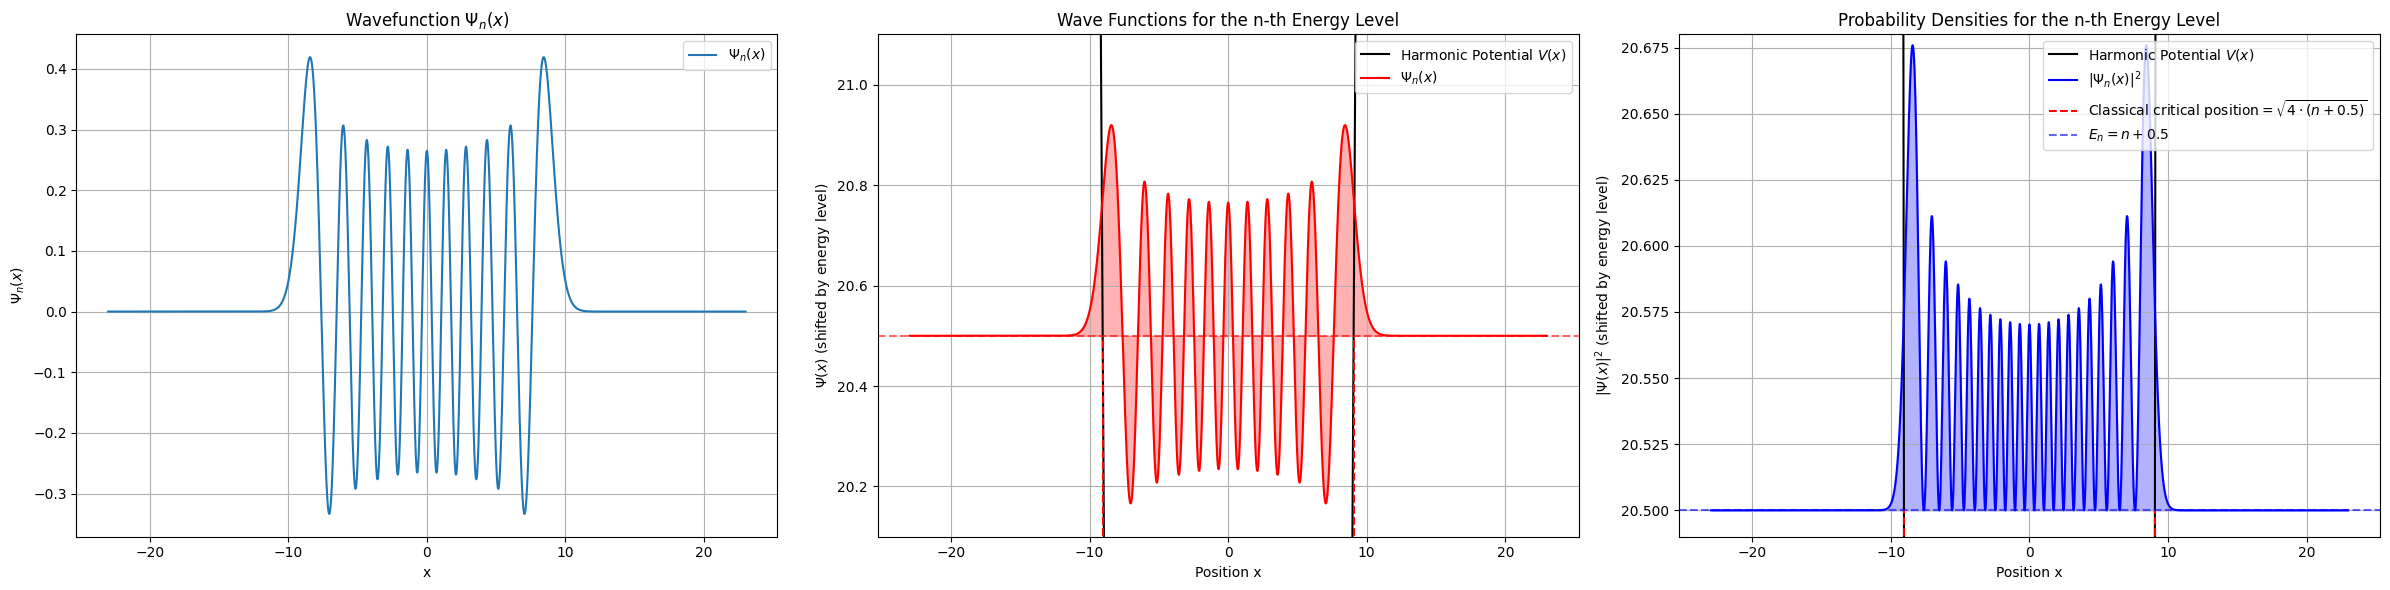

In [14]:
# Calculs et définitions (les fonctions psi_n, prob_psi_n, energy_levels, calc_xcr, harmonic_potential doivent être définies au préalable)
n = 20
x_0 = 1.
omega = hbar / (2 * m * x_0**2)
x_values = np.linspace(-23, 23, 10001)
psi_values = psi_n(x_values, n)
prob_ = prob_psi_n(x_values, n, x_0=1)
# print(normalize_check(n,x_0))
energy_ = energy_levels(n, omega)
xcr = calc_xcr(x_0, n)
print(energy_/(hbar*omega))
print(xcr)

# Création d'une figure avec 3 sous-graphes côte à côte
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Graphique 1 : Wavefunction Ψₙ(x)
axs[0].plot(x_values, psi_values, label="$\Psi_{n}(x)$")
axs[0].set_xlabel("x")
axs[0].set_ylabel("$\Psi_{n}(x)$")
axs[0].set_title("Wavefunction $\Psi_{n}(x)$")
axs[0].legend()
axs[0].grid()

# Calcul du potentiel
potential = harmonic_potential(x_values, omega)

# Graphique 2 : Wave functions for the n-th Energy Level
axs[1].plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")
axs[1].plot(x_values, psi_values + energy_/(hbar*omega), label=r"$\Psi_{n}(x)$", color="red")
axs[1].vlines(xcr, ymin=0, ymax=energy_/(hbar*omega), linestyles='dashed', colors="red")
axs[1].vlines(-xcr, ymin=0, ymax=energy_/(hbar*omega), linestyles='dashed', colors="red")
axs[1].fill_between(x_values, energy_/(hbar*omega), psi_values + energy_/(hbar*omega), color="red", alpha=0.3)  # Highlight area
axs[1].axhline(y=energy_/(hbar*omega), color="red", linestyle="--", alpha=0.6)
axs[1].set_title("Wave Functions for the n-th Energy Level")
axs[1].set_xlabel("Position x")
axs[1].set_ylabel(r"$\Psi(x)$ (shifted by energy level)")
axs[1].legend()
axs[1].set_ylim([n+.1, n+1.1])                                                                       ##---------- Changer les valeurs de y pour mieux visualiser ----------##  
axs[1].grid()

# Graphique 3 : Probability Densities for the n-th Energy Level
axs[2].plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")
axs[2].plot(x_values, prob_ + energy_/(hbar*omega), label=r"$|\Psi_{n}(x)|^2$", color="blue")
axs[2].vlines(xcr, ymin=0, ymax=energy_/(hbar*omega), linestyles='dashed', colors="red", label=r"$\text{Classical critical position} = \sqrt{4 \cdot (n + 0.5)}$")
axs[2].vlines(-xcr, ymin=0, ymax=energy_/(hbar*omega), linestyles='dashed', colors="red")
axs[2].fill_between(x_values, energy_/(hbar*omega), prob_ + energy_/(hbar*omega), color="blue", alpha=0.3)  # Highlight area
axs[2].axhline(y=energy_/(hbar*omega), color="blue", linestyle="--", label=r"$E_{n} = n+0.5$", alpha=0.6)
axs[2].set_title("Probability Densities for the n-th Energy Level")
axs[2].set_xlabel("Position x")
axs[2].set_ylabel(r"$|\Psi(x)|^2$ (shifted by energy level)")
axs[2].legend()
axs[2].set_ylim([n+.49, n+.68])                                                                       ##---------- Changer les valeurs de y pour mieux visualiser ----------##  
axs[2].grid()

plt.tight_layout()
plt.show()
